In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
data=pd.read_excel("qwerty2.xlsx")
# Assuming 'data' DataFrame is already loaded
split = np.random.rand(len(data)) < 0.8
train = data[split]
test = data[~split]
print("Training Data Shape", len(train))
print("Testing Data Shape", len(test))

C:\Users\ajayk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training Data Shape 87
Testing Data Shape 26


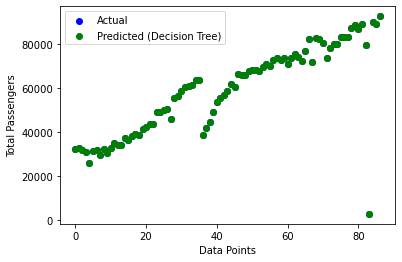

Root Mean Squared Error (RMSE): 4346.379576506972
R2 Score: 0.9307153521290995
Predicted Number of Passengers: 32199.0
Predicted Number of Passengers: 80527.0


In [2]:


# Prepare the data
X_train = train[['Average Temperature (°F)', 'Snow', 'Emergency situations', 'Fuel Prices']]
y_train = train['Total Passangers']

X_test = test[['Average Temperature (°F)', 'Snow', 'Emergency situations', 'Fuel Prices']]
y_test = test['Total Passangers']

# Create and fit the decision tree model
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = reg_tree.predict(X_train)

# Plotting the Results
x = np.arange(0, len(train), 1)
plt.scatter(x, y_train, color="blue", label="Actual")
plt.scatter(x, y_train_pred, color="green", label="Predicted (Decision Tree)")


plt.xlabel("Data Points")
plt.ylabel("Total Passengers")
plt.legend()
plt.show()

# Testing the Model
y_test_pred = reg_tree.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R2 Score:", r2_score(y_test, y_test_pred))

# Assuming 'reg_tree' is already trained
# Create a function for prediction
def predict_passengers_decision_tree(temperature, snow, emergency_situations, fuel_prices):
    # Prepare the input data
    input_data = np.array([[temperature, snow, emergency_situations, fuel_prices]])

    # Predict the number of passengers
    predicted_passengers = reg_tree.predict(input_data)

    # Display the prediction
    print(f"Predicted Number of Passengers: {predicted_passengers[0]}")

# Test the prediction function
predict_passengers_decision_tree(30.15, 0, 0, 2.45)
predict_passengers_decision_tree(37, 0, 0, 3.77)


In [3]:
# Transform the input data for prediction
X_all = data[['Average Temperature (°F)', 'Snow', 'Emergency situations', 'Fuel Prices']]
y_all_pred = reg_tree.predict(X_all)

# Display the predictions
predictions_tree = pd.DataFrame({'Predicted Total Passengers (Decision Tree)': y_all_pred})
result_tree = pd.concat([data, predictions_tree], axis=1)
print(result_tree[['Total Passangers', 'Predicted Total Passengers (Decision Tree)']])



     Total Passangers  Predicted Total Passengers (Decision Tree)
0               32301                                     32301.0
1               32805                                     32805.0
2               32046                                     32046.0
3               30884                                     30884.0
4               26124                                     26124.0
..                ...                                         ...
108             90059                                     90059.0
109             89043                                     89043.0
110             83505                                     90059.0
111             92744                                     92744.0
112             93858                                     80527.0

[113 rows x 2 columns]
